In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout # optionally we can remove dropout from our layers
from keras.optimizers import SGD
from keras.optimizers import RMSprop

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#Initialising the Neural Network
classifier = Sequential()

In [4]:
#Convolution
classifier.add(Conv2D(filters = 32,
                        kernel_size = 3,
                        input_shape = [128, 128, 3],
                        activation = 'relu'))

In [5]:
#Pooling
classifier.add(MaxPool2D(pool_size = 2,
                        strides = 2))

In [6]:
#Adding additional layers
# Second convolution layer
classifier.add(Conv2D(filters = 32,
                        kernel_size = 3,
                        activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPool2D(pool_size = 2,
                        strides = 2))

# Third convolution layer
classifier.add(Conv2D(filters = 32,
                        kernel_size = 3,
                        activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(MaxPool2D(pool_size = 2,
                        strides = 2))

# Fourth convolution layer
classifier.add(Conv2D(filters = 32,
                        kernel_size = 3,
                        activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(MaxPool2D(pool_size = 2,
                        strides = 2))


In [7]:
#Flattening
classifier.add(Flatten())

In [8]:
#Full connection (output layer)
classifier.add(Dense(units = 32,
                   activation = 'relu'))
classifier.add(Dense(units = 1,
                activation = 'sigmoid'))

In [9]:
#Compiling the neural network
classifier.compile(optimizer = 'Adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [10]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
dropout (Dropout)            (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0

In [11]:
#Importing train and test images
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('A:/downloads/archive/chest_xray/chest_xray/train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('A:/downloads/archive/chest_xray/chest_xray/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [14]:
#Fitting the classifier to the dataset
classifier.fit(x = training_set,
                epochs = 1,
                validation_data = test_set)

163/163 [==============================] - 399s 2s/step - loss: 0.5505 - accuracy: 0.7264 - val_loss: 0.4977 - val_accuracy: 0.7660


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
evaluation_result =classifier.evaluate(x=test_set)
print('loss rate at evaluation data :', evaluation_result[0])
print('accuracy rate at evaluation data :',evaluation_result[1])


20/20 [==============================] - 8s 401ms/step - loss: 0.4977 - accuracy: 0.7660
loss rate at evaluation data : 0.4977322518825531
accuracy rate at evaluation data : 0.7660256624221802


In [17]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

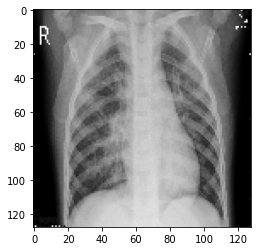

PNEUMONIA


In [18]:
img=image.load_img('A:/downloads/archive/chest_xray/test/PNEUMONIA/person63_virus_121.jpeg',target_size=(128,128))
plt.imshow(img)
plt.show()
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)
result =classifier.predict(img)
if result[0] == 1:
  prediction = 'PNEUMONIA'
else:
  prediction = 'Normal'
print(prediction)

In [19]:
evaluation_result = classifier.evaluate(x = test_set)

20/20 [==============================] - 9s 428ms/step - loss: 0.4977 - accuracy: 0.7660
